In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
# Load the data
data = pd.read_csv("hepatitis.csv")

In [39]:
data

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [24]:
# oversample the training data
sm = SMOTE(random_state=42)
X = data.drop("class", axis=1)
y = data["class"]

X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

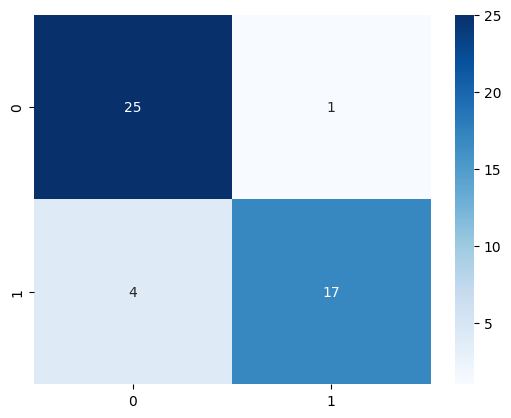

Logistic Regression: 0.8936170212765957
              precision    recall  f1-score   support

           1       0.86      0.96      0.91        26
           2       0.94      0.81      0.87        21

    accuracy                           0.89        47
   macro avg       0.90      0.89      0.89        47
weighted avg       0.90      0.89      0.89        47



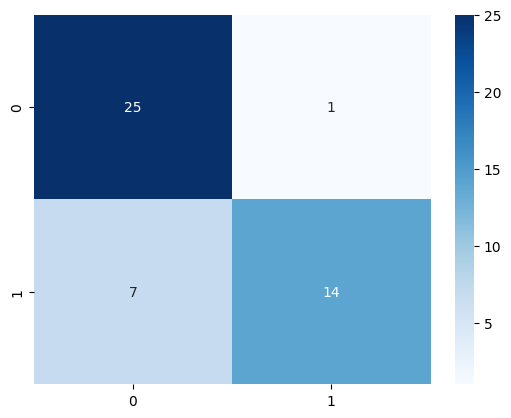

Decision Tree: 0.8297872340425532
              precision    recall  f1-score   support

           1       0.78      0.96      0.86        26
           2       0.93      0.67      0.78        21

    accuracy                           0.83        47
   macro avg       0.86      0.81      0.82        47
weighted avg       0.85      0.83      0.82        47



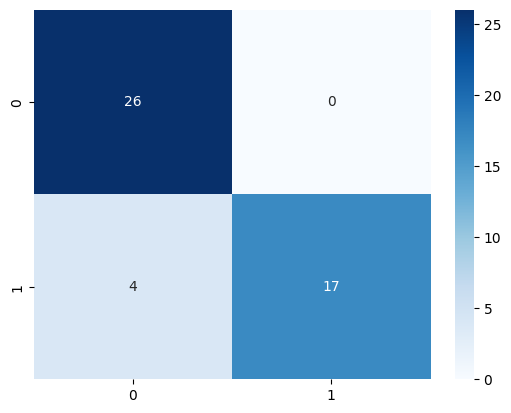

Random Forest: 0.9148936170212766
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        26
           2       1.00      0.81      0.89        21

    accuracy                           0.91        47
   macro avg       0.93      0.90      0.91        47
weighted avg       0.93      0.91      0.91        47



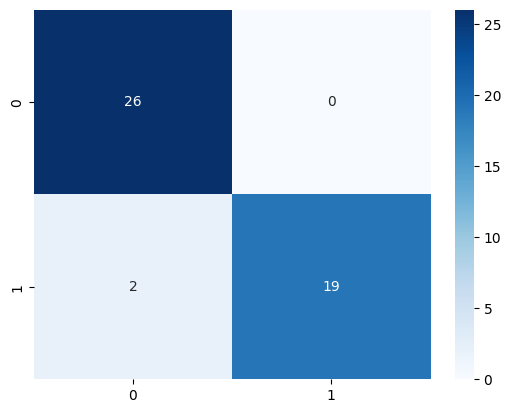

Support Vector Machine: 0.9574468085106383
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       1.00      0.90      0.95        21

    accuracy                           0.96        47
   macro avg       0.96      0.95      0.96        47
weighted avg       0.96      0.96      0.96        47



In [25]:
# Create a pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", None)
])

# Add different classification models to the pipeline
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate the models
for name, model in models.items():
    pipeline.set_params(model=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.show()
    print(f"{name}: {accuracy}")
    print(classification_report(y_test, y_pred))


In [46]:
from joblib import dump, load

In [33]:
# save the best model
pipeline.set_params(model=SVC())
pipeline.fit(X_train, y_train)
dump(pipeline, "model.joblib")


['model.joblib']

In [37]:
len(X_train.columns.to_list())

19

In [35]:
X_test.iloc[0]

age                55.000000
sex                 1.000000
steroid             1.000000
antivirals          2.000000
fatigue             1.000000
malaise             1.000000
anorexia            1.000000
liver_big           2.000000
liver_firm          2.000000
spleen_palable      1.000000
spiders             1.000000
ascites             1.000000
varices             2.000000
bilirubin           3.284778
alk_phosphate     105.000000
sgot               59.000000
albumin             2.968067
protime            69.000000
histology           1.000000
Name: 219, dtype: float64

In [50]:
# create a function to predict the class of a patient
def get_input(age, sex, steriod, antivirals, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable, spiders, ascites, varices, bilirubin, alk_phosphate, sgot, albumin, protime, histology):
    # create a dictionary
    input = {
        "age": age,
        'sex': sex,
        'steroid': steriod,
        'antivirals': antivirals,
        'fatigue': fatigue,
        'malaise': malaise,
        'anorexia': anorexia,
        'liver_big': liver_big,
        'liver_firm': liver_firm,
        'spleen_palable': spleen_palpable,
        'spiders': spiders,
        'ascites': ascites,
        'varices': varices,
        'bilirubin': bilirubin,
        'alk_phosphate': alk_phosphate,
        'sgot': sgot,
        'albumin': albumin,
        'protime': protime,
        'histology': histology
    }
    return input


In [51]:
# test the function

xinput = get_input(
    age=30,
    sex=1,
    steriod=1,
    antivirals=1,
    fatigue=1,
    malaise=1,
    anorexia=1,
    liver_big=1,
    liver_firm=1,
    spleen_palpable=1,
    spiders=1,
    ascites=1,
    varices=1,
    bilirubin=1,
    alk_phosphate=1,
    sgot=1,
    albumin=1,
    protime=1,
    histology=1
)

In [53]:
def predict(xinput):
    xinput = pd.DataFrame(xinput, index=[0])
    model = load("model.joblib")
    y_pred = model.predict(xinput)
    if y_pred == 1:
        return "May have liver disease (Hepatitis)"
    else:
        return "Don't have liver disease (Hepatitis)"

In [54]:
predict(xinput)

"Don't have liver disease (Hepatitis)"